In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
import seaborn as sns

from pickle import dump, load

---
Load in the test-data

In [2]:
X_test = pd.read_csv(os.path.join('data', 'test.csv'))
y_test = pd.read_csv(os.path.join('data', 'gender_submission.csv')).Survived

---
Plotting utilities.

In [3]:
def confusion_matrix_on_test(name, estimator):
    y_test_pred = estimator.predict(X_test)

    print(f"{name}:")
    print(f"Accuracy on the test-set: {accuracy_score(y_test, y_test_pred)}")

    cm = confusion_matrix(y_test, y_test_pred)
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 5)
    sns.heatmap(cm, ax=ax, annot=True, fmt='d', cmap="YlGnBu")
    ax.set_xlabel('Predicted', fontsize=14)
    ax.set_ylabel('True', fontsize=14)
    plt.title(f'Confusion matrix on the test-set', fontsize=15)
    plt.show()
    
def ROC_on_test(estimators):
    
    fig, ax = plt.subplots(ncols=1)
    fig.set_size_inches(6, 6)
    
    for name, estimator in estimators.items():
        
        y_test_proba = estimator.predict_proba(X_test)[:,1]    
        fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
        ax.plot(fpr, tpr, label=name)

    ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='ROC curve')
    ax.grid(True)
    ax.legend()
    plt.show()

---
Build the preprocessing pipeline by running the script (see previous notebooks for details).

In [4]:
%run build_preprocess_pipe.py

---
Load in the classifier.

In [5]:
with open("vote_clf.pkl", "rb") as file:
    vote_clf = load(file)

Voting Classifier:
Accuracy on the test-set: 0.9066985645933014


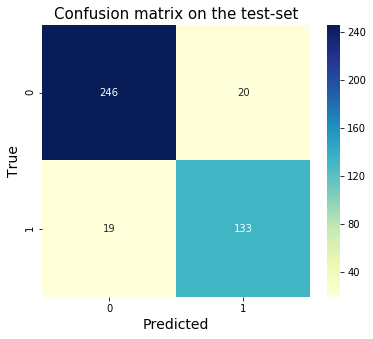

In [6]:
confusion_matrix_on_test("Voting Classifier", vote_clf)

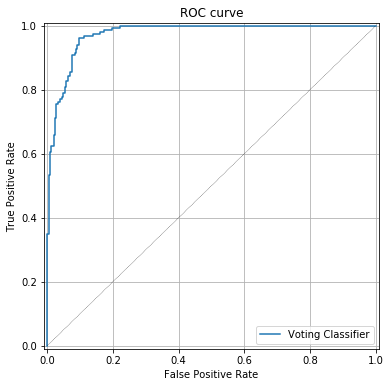

In [7]:
ROC_on_test({"Voting Classifier": vote_clf})

In [8]:
roc_auc_score(y_test, vote_clf.predict(X_test))

0.899906015037594

## Summary:

* We seem to have been lucky: the accuracy on test-data is much better than on validation data: 91%.

* There is nice balance between false-positives and false-negatives.

* The ROC-curve is pleasantly quasi-smooth, almost concave, and the AUC-score is 90%.